In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Set paths
dataset_path = '/content/drive/MyDrive/PlantDisease/apple'  # ✅ Adjust if needed
model_save_path = '/content/drive/MyDrive/savedModels/apple_disease_model.h5'

# STEP 3: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# STEP 4: Prepare data generators
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# STEP 5: Load MobileNetV2 base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze base

# STEP 6: Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# STEP 7: Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 8: Train model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

# STEP 9: Save trained model
model.save(model_save_path)
print("✅ Apple disease model saved at:", model_save_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1315 images belonging to 5 classes.
Found 326 images belonging to 5 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 919s 22s/step - accuracy: 0.2611 - loss: 1.9368 - val_accuracy: 0.4816 - val_loss: 1.2711
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.3839 - loss: 1.4575 - val_accuracy: 0.5920 - val_loss: 1.0408
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.5091 - loss: 1.2100 - val_accuracy: 0.6350 - val_loss: 0.9298
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.6014 - loss: 1.0005 - val_accuracy: 0.6626 - val_loss: 0.8465
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.6624 - loss: 0.8918 - val_accuracy: 0.6963 - val_loss: 0.8024
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7393 - loss: 0.7284 - val_accuracy: 0.7239 - val_loss: 0.7395
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.7462 - loss: 0.7174 - val_accuracy: 0.7454 - val_loss: 0.6687
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.7948 - loss: 0.6018 - val_accuracy: 0.7669 - v

✅ Apple disease model saved at: /content/drive/MyDrive/savedModels/apple_disease_model.h5


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1315 images belonging to 5 classes.
Found 326 images belonging to 5 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2278 - loss: 2.3792

42/42 ━━━━━━━━━━━━━━━━━━━━ 329s 8s/step - accuracy: 0.2285 - loss: 2.3751 - val_accuracy: 0.3957 - val_loss: 1.4945 - learning_rate: 1.0000e-04
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3025 - loss: 1.8767

42/42 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.3032 - loss: 1.8751 - val_accuracy: 0.4632 - val_loss: 1.2919 - learning_rate: 1.0000e-04
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3679 - loss: 1.6610

42/42 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.3687 - loss: 1.6587 - val_accuracy: 0.5123 - val_loss: 1.1803 - learning_rate: 1.0000e-04
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4309 - loss: 1.4351

42/42 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.4316 - loss: 1.4333 - val_accuracy: 0.6472 - val_loss: 0.9552 - learning_rate: 1.0000e-04
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5192 - loss: 1.2060

42/42 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.5197 - loss: 1.2057 - val_accuracy: 0.7055 - val_loss: 0.8897 - learning_rate: 1.0000e-04
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5624 - loss: 1.0725

42/42 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.5628 - loss: 1.0719 - val_accuracy: 0.7270 - val_loss: 0.8234 - learning_rate: 1.0000e-04
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5815 - loss: 1.0605

42/42 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5819 - loss: 1.0599 - val_accuracy: 0.7055 - val_loss: 0.8167 - learning_rate: 1.0000e-04
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6364 - loss: 0.9274

42/42 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6367 - loss: 0.9276 - val_accuracy: 0.7393 - val_loss: 0.7389 - learning_rate: 1.0000e-04
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6947 - loss: 0.8140

42/42 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.6945 - loss: 0.8146 - val_accuracy: 0.7485 - val_loss: 0.6951 - learning_rate: 1.0000e-04
Epoch 10/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6726 - loss: 0.8368

42/42 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.6729 - loss: 0.8364 - val_accuracy: 0.7791 - val_loss: 0.6489 - learning_rate: 1.0000e-04
Epoch 11/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7000 - loss: 0.8144

42/42 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.7005 - loss: 0.8133 - val_accuracy: 0.7638 - val_loss: 0.6400 - learning_rate: 1.0000e-04
Epoch 12/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7322 - loss: 0.7149 - val_accuracy: 0.7822 - val_loss: 0.6428 - learning_rate: 1.0000e-04
Epoch 13/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7791 - loss: 0.6178

42/42 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7784 - loss: 0.6196 - val_accuracy: 0.8006 - val_loss: 0.5952 - learning_rate: 1.0000e-04
Epoch 14/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7874 - loss: 0.6255 - val_accuracy: 0.8067 - val_loss: 0.6084 - learning_rate: 1.0000e-04
Epoch 15/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7558 - loss: 0.6883

42/42 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.7560 - loss: 0.6875 - val_accuracy: 0.7975 - val_loss: 0.5654 - learning_rate: 1.0000e-04
Epoch 16/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8009 - loss: 0.5853

42/42 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.8010 - loss: 0.5852 - val_accuracy: 0.7975 - val_loss: 0.5647 - learning_rate: 1.0000e-04
Epoch 17/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7872 - loss: 0.5915

42/42 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.7873 - loss: 0.5915 - val_accuracy: 0.8313 - val_loss: 0.5273 - learning_rate: 1.0000e-04
Epoch 18/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8140 - loss: 0.5420

42/42 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.8137 - loss: 0.5425 - val_accuracy: 0.8313 - val_loss: 0.5218 - learning_rate: 1.0000e-04
Epoch 19/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8029 - loss: 0.5346

42/42 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8027 - loss: 0.5349 - val_accuracy: 0.8252 - val_loss: 0.5148 - learning_rate: 1.0000e-04
Epoch 20/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8095 - loss: 0.5408 - val_accuracy: 0.8221 - val_loss: 0.5159 - learning_rate: 1.0000e-04
Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.5404 - loss: 1.1788 - val_accuracy: 0.7853 - val_loss: 0.5394 - learning_rate: 1.0000e-05
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.7054 - loss: 0.7477 - val_accuracy: 0.7607 - val_loss: 0.5809 - learning_rate: 1.0000e-05
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.7854 - loss: 0.5769 - val_accuracy: 0.7209 - val_loss: 0.6274 - learning_rate: 1.0000e-05
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.8492 - loss: 0.4692 - val_accuracy: 0.7761 - val_loss: 0.5888 - learning_rate: 1.0000e-05
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.8305 - loss: 0.

✅ Fine-tuned Apple model saved at: /content/drive/MyDrive/savedModels/apple_disease_model.h5


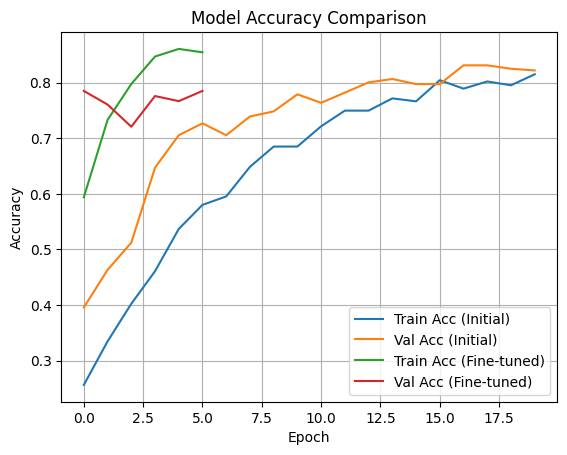

In [3]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Set dataset and model paths
dataset_path = '/content/drive/MyDrive/PlantDisease/apple'
model_save_path = '/content/drive/MyDrive/savedModels/apple_disease_model.h5'

# STEP 3: Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

# STEP 4: Data generators
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# STEP 5: Load MobileNetV2
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
base_model.trainable = False

# STEP 6: Add custom classifier head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# STEP 7: Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 8: Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, min_lr=1e-6)
checkpoint = ModelCheckpoint(model_save_path, save_best_only=True)

# STEP 9: Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop, lr_reduce, checkpoint]
)

# STEP 10: Fine-tune by unfreezing top layers
base_model.trainable = True
for layer in base_model.layers[:-40]:  # Freeze all but the last 40 layers
    layer.trainable = False

model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, lr_reduce, checkpoint]
)

# STEP 11: Save final model
model.save(model_save_path)
print("✅ Fine-tuned Apple model saved at:", model_save_path)

# STEP 12: Accuracy Plot
def plot_history(histories, labels):
    for hist, label in zip(histories, labels):
        plt.plot(hist.history['accuracy'], label=f'Train Acc ({label})')
        plt.plot(hist.history['val_accuracy'], label=f'Val Acc ({label})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history, fine_tune_history], ['Initial', 'Fine-tuned'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving images (16).jpeg to images (16).jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🍎 Predicted Disease: Alteria leaf spot
✅ Confidence: 40.82%
💡 Fertilizer Suggestion: 🧪 Use Mancozeb or Chlorothalonil. Ensure proper drainage and avoid overhead watering.


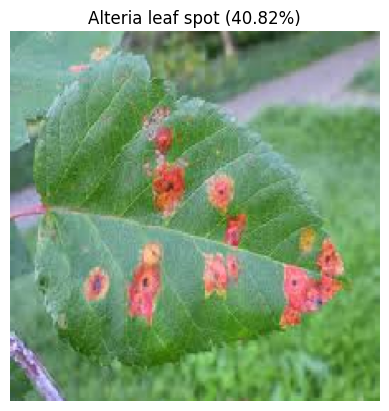

In [5]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Upload a custom image for prediction
from google.colab import files
uploaded = files.upload()

import os
image_path = list(uploaded.keys())[0]  # Name of the uploaded image

# STEP 3: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# STEP 4: Load the trained apple model
model = load_model('/content/drive/MyDrive/savedModels/apple_disease_model.h5')  # ✅ Update path if saved elsewhere

# STEP 5: Preprocess the uploaded image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# STEP 6: Predict the disease class
pred = model.predict(img_array)
class_index = np.argmax(pred[0])
confidence = np.max(pred[0]) * 100

# STEP 7: Class labels and fertilizer suggestions (edit based on your dataset)
class_labels = ['Alteria leaf spot', 'Brown spot', 'Gray spot', 'Healthy leaf', 'Rust']

fertilizer_suggestions = {
    'Alteria leaf spot': '🧪 Use Mancozeb or Chlorothalonil. Ensure proper drainage and avoid overhead watering.',
    'Brown spot': '🌿 Apply fungicides such as Captan or Copper-based sprays. Remove infected leaves regularly.',
    'Gray spot': '💨 Improve air circulation, avoid overcrowding. Use Daconil or appropriate fungicides.',
    'Healthy leaf': '✅ No disease detected. Maintain balanced fertilizer schedule, preferably NPK 20-20-20.',
    'Rust': '🍂 Use Sulfur-based fungicides. Remove and destroy affected leaves. Maintain field hygiene.'
}


# STEP 8: Output the prediction and fertilizer suggestion
predicted_label = class_labels[class_index]
suggestion = fertilizer_suggestions.get(predicted_label, "No suggestion available.")

print(f"🍎 Predicted Disease: {predicted_label}")
print(f"✅ Confidence: {confidence:.2f}%")
print(f"💡 Fertilizer Suggestion: {suggestion}")

# STEP 9: Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title(f"{predicted_label} ({confidence:.2f}%)")
plt.show()
